C:\Users\sunyx\AppData\Local\Temp\ipykernel_19860\3355202755.py:36: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(np.log10(T_grid), np.log10(rho_grid), np.log10(boundary_gas_rad), levels=[0], colors='blue', label='Ideal Gas = Radiation')
C:\Users\sunyx\AppData\Local\Temp\ipykernel_19860\3355202755.py:37: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(np.log10(T_grid), np.log10(rho_grid), np.log10(boundary_gas_deg_nr), levels=[0], colors='green', label='Ideal Gas = Degeneracy')
C:\Users\sunyx\AppData\Local\Temp\ipykernel_19860\3355202755.py:38: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(np.log10(T_grid), np.log10(rho_grid), np.log10(boundary_deg_nr_rel), levels=[0], colors='red', label='Non-relativistic = Relativistic Degeneracy')


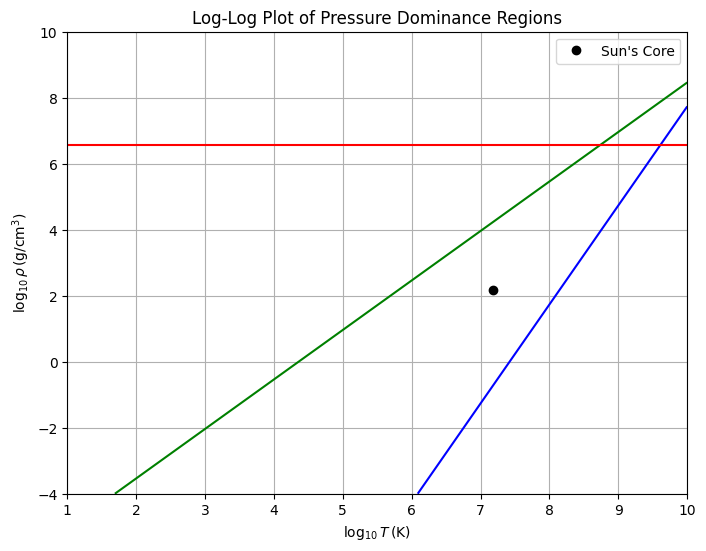

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k_B = 1.380649e-16  # Boltzmann constant in erg/K
m_u = 1.66053906660e-24  # Atomic mass unit in grams
a_rad = 7.5646e-15  # Radiation constant in erg/cm^3/K^4
h = 6.62607015e-27  # Planck's constant in erg·s
m_e = 9.10938356e-28  # Electron mass in grams
c = 2.998e10  # Speed of light in cm/s

# Parameters for the Sun
mu = 0.6  # Mean molecular weight for the Sun
mu_e = 2.0  # Mean electron molecular weight for the Sun

# Temperature and density ranges
T = np.logspace(1, 10, 100)  # Temperature range: 10 K < T < 10^10 K
rho = np.logspace(-4, 10, 100)  # Density range: 10^-4 g/cm^3 < rho < 10^10 g/cm^3
T_grid, rho_grid = np.meshgrid(T, rho)

# Boundary between ideal gas and radiation pressure
P_gas = rho_grid * k_B * T_grid / (mu * m_u)
P_rad = a_rad * T_grid**4
boundary_gas_rad = P_gas / P_rad

# Updated boundary between ideal gas and electron degeneracy pressure (non-relativistic)
P_deg_nr = (h**2 / (20 * m_e)) * (3 / np.pi)**(2 / 3) * (rho_grid / (mu_e * m_u))**(5 / 3)
boundary_gas_deg_nr = P_gas / P_deg_nr

# Updated boundary between non-relativistic and relativistic electron degeneracy
P_deg_rel = (h * c / 8) * (3 / np.pi)**(1 / 3) * (rho_grid / (mu_e * m_u))**(4 / 3)
boundary_deg_nr_rel = P_deg_nr / P_deg_rel

# Plot the boundaries
plt.figure(figsize=(8, 6))
plt.contour(np.log10(T_grid), np.log10(rho_grid), np.log10(boundary_gas_rad), levels=[0], colors='blue', label='Ideal Gas = Radiation')
plt.contour(np.log10(T_grid), np.log10(rho_grid), np.log10(boundary_gas_deg_nr), levels=[0], colors='green', label='Ideal Gas = Degeneracy')
plt.contour(np.log10(T_grid), np.log10(rho_grid), np.log10(boundary_deg_nr_rel), levels=[0], colors='red', label='Non-relativistic = Relativistic Degeneracy')

# Mark the central conditions of the Sun
T_sun = 1.5e7  # Temperature of the Sun's core in K
rho_sun = 150  # Density of the Sun's core in g/cm^3
plt.plot(np.log10(T_sun), np.log10(rho_sun), 'ko', label='Sun\'s Core')

# Label the plot
plt.xlim(1, 10)
plt.ylim(-4, 10)
plt.xlabel(r'$\log_{10} T \, (\mathrm{K})$')
plt.ylabel(r'$\log_{10} \rho \, (\mathrm{g/cm^3})$')
plt.title('Log-Log Plot of Pressure Dominance Regions')
plt.legend()

# Show plot
plt.grid(True)
plt.show()
